In [25]:
%matplotlib inline
import matplotlib as mpl
mpl.style.use('/Users/nik/Dropbox/Notebooks/thesisrc.py')
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import pandas as pd
import lvdatatools as lvdt

# SCFM8_q3

Sputtered Co with AlOx/Ti/Au top gate.

In [28]:
rt_dir = '/Volumes/JUPITER/Data/scfmf8_q3/room_temp/'
cold_dir = '/Volumes/JUPITER/Data/scfmf8_q3/4K/'
fig_dir = '/Volumes/JUPITER/Data/scfmf8/figures/'

## Room Temperature

In [29]:
for i, f in enumerate(glob.glob(os.path.join(rt_dir, '*.txt'))):
    print i, f.split('/')[-1]

0 cooldown_14-11_1-15_a.txt
1 cooldown_14-11_1-15_b.txt
2 cooldown_14-11_1-15_c.txt
3 cooldown_14-11_1-15_d.txt
4 gateswp_14-11_1-15_a.txt
5 gateswp_14-11_1-15_b.txt
6 gateswp_14-11_1-15_c.txt
7 gateswp_14-11_1-15_d.txt
8 gateswp_14-11_1-15_e.txt
9 gateswp_14-11_1-15_f.txt
10 gateswp_14-11_1-15_g.txt
11 gateswp_14-11_1-15_h.txt
12 topgateswp_14-11_1-15_a.txt
13 topgateswp_14-11_1-15_b.txt
14 topgateswp_14-11_1-15_c.txt
15 topgateswp_14-11_1-15_d.txt
16 topgateswp_14-11_1-15_e.txt
17 topgateswp_14-11_1-15_f.txt
18 vi_14-11_1-15_b.txt
19 vi_14-11_1-15_a.txt


In [30]:
def quick_plot_all(filename):
    """ for use in a for-loop when trolling through a whole folder of data.
        trying to catch exceptions as they arise. """
    dimension = lvdt.is_2d(filename)
    if dimension==2:
        try:
            df = lvdt.get_data_2d(filename)
            fig, ax = lvdt.plot_simple_2d(df)
        except(AttributeError, ValueError, IndexError): 
            return 'Fail -- 2d. A real problem.'
    elif dimension==3:
        try:
            df = lvdt.get_data_3d(filename)
            fig, ax, cb = lvdt.plot_simple_3d(df)
        except(AttributeError, ValueError, IndexError): 
            return 'Fail -- 3d. A real problem.'
    else:
        return 'Ignored. No .txt file to match.'
    ax.set_title(r'$\verb|{0}|$'.format(f.split('/')[-1]))
    return 'Pass -- {0}d. Good job, buddy.'.format(dimension)

### Gate Sweeps

In [31]:
filelist = glob.glob(os.path.join(rt_dir,'*gateswp*.bin'))

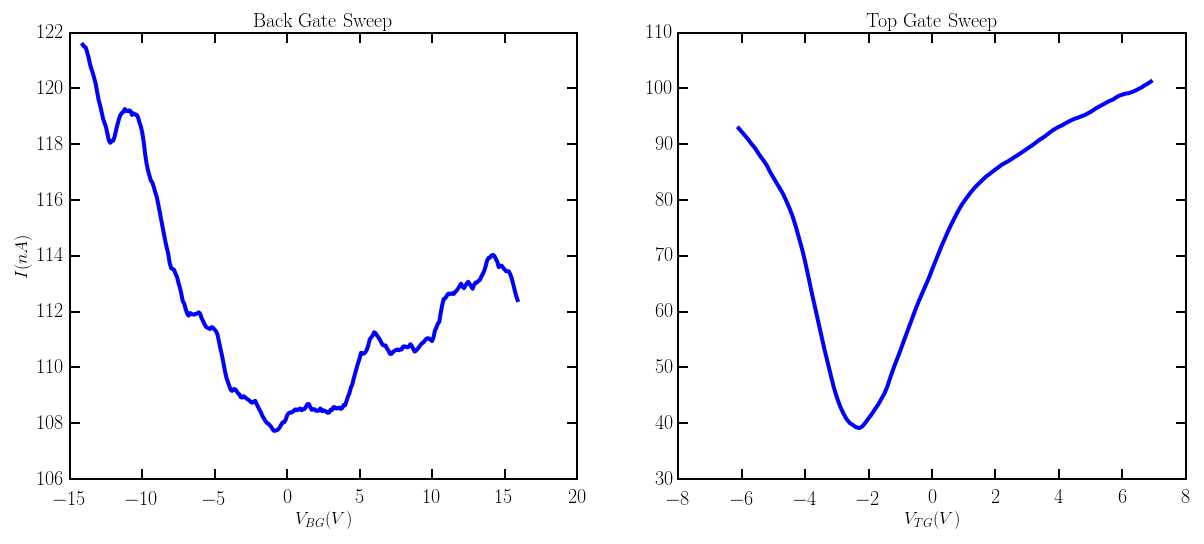

In [42]:
b = os.path.join(rt_dir, 'gateswp_14-11_1-15_h.bin')
# bias = 25m, top gate = 0V
back = lvdt.get_data_2d(b)

t = os.path.join(rt_dir, 'topgateswp_14-11_1-15_f.bin')
# bias = 25m, back gate = 0V
top = lvdt.get_data_2d(t)

top['dir'] = (top['Gate']-top['Gate'].shift()).fillna(0)
top_down = top[top['dir']<0].sort('Gate')
top_down = top_down.groupby(top_down['Gate']).mean()
top_down = pd.rolling_mean(top_down, 10)

back['dir'] = (back['Gate']-back['Gate'].shift()).fillna(0)
back_down = back[back['dir']<0].sort('Gate')
back_down = back_down.groupby(back_down['Gate']).mean()
back_down = pd.rolling_mean(back_down, 20)

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20, 8))
ax1.plot(back_down.index, back_down['Iavg']*1e9)
ax1.set_xlabel(r'$V_{BG} (V)$')
ax1.set_ylabel(r'$I (nA)$')
ax1.set_title('Back Gate Sweep')

ax2.plot(top_down.index, top_down['Iavg']*1e9)
ax2.set_xlabel(r'$V_{TG} (V)$')
ax2.set_title('Top Gate Sweep')

fig.savefig(os.path.join(thesis_dir, 'local_gate_rt.pdf'))

## 4K

In [87]:
for i, f in enumerate(glob.glob(os.path.join(cold_dir, '*.txt'))):
    print i, f.split('/')[-1]

0 gateswp_14-11_1-15_a.txt
1 gateswp_14-11_1-15_b.txt
2 twogateswp_14-11_1-15_a.txt


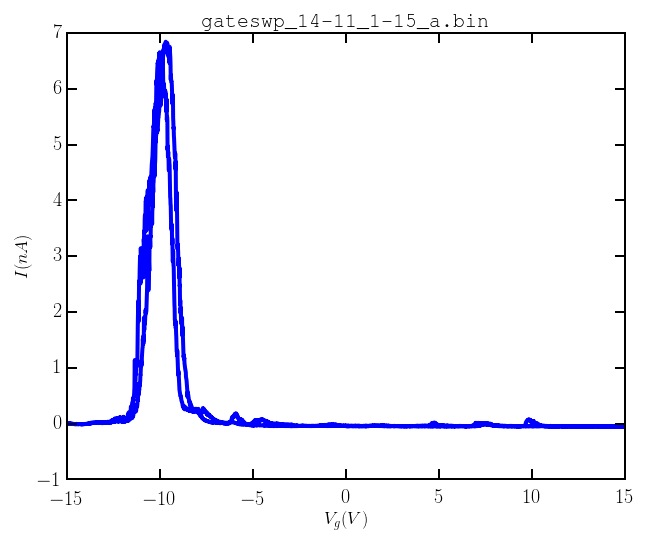

In [88]:
# fix top gate, fix bias, sweep back gate
# bias = 5m
# V_tg = 0V

f = os.path.join(cold_dir, 'gateswp_14-11_1-15_a.bin')
header = lvdt.get_txt(f) # bias = 25m, top gate = 0V
df = lvdt.get_data_2d(f)

fig, ax = plt.subplots()
ax.plot(df['Gate'], df['Iavg']*1e9)
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$I (nA)$')
ax.set_title(r'$\verb|{0}|$'.format(f.split('/')[-1]))

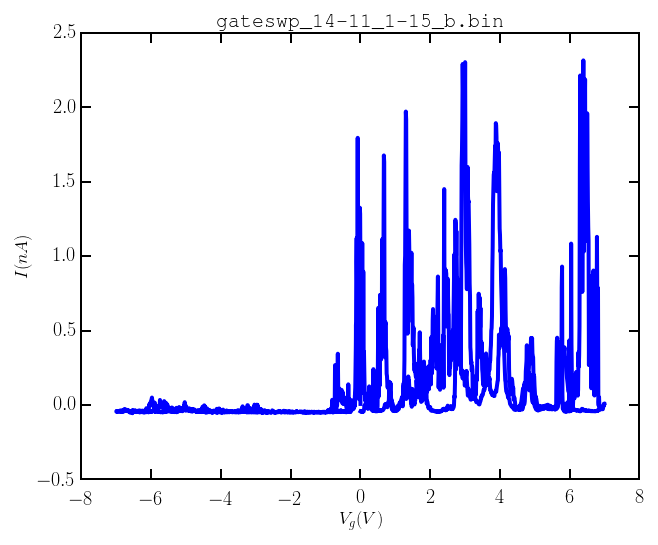

In [89]:
# fix back gate, fix bias, sweep top gate
# bias = 5m
# V_bg = 0V

f = os.path.join(cold_dir, 'gateswp_14-11_1-15_b.bin')
header = lvdt.get_txt(f) # bias = 25m, top gate = 0V
df = lvdt.get_data_2d(f)

fig, ax = plt.subplots()
ax.plot(df['Gate'], df['Iavg']*1e9)
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$I (nA)$')
ax.set_title(r'$\verb|{0}|$'.format(f.split('/')[-1]))

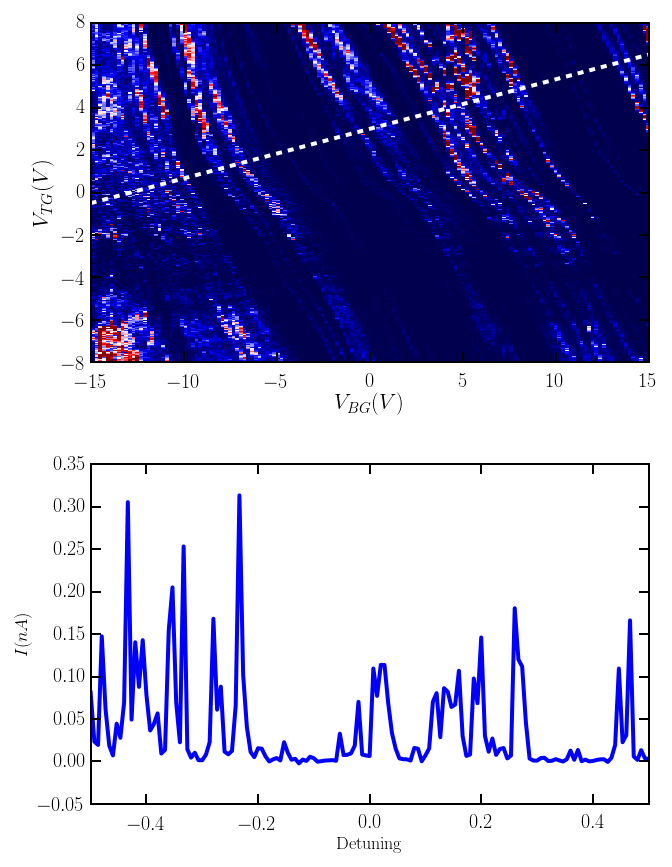

In [77]:
# fix bias, fast sweep top gate, slow sweep back gate
# bias = 5m
f = os.path.join(cold_dir,'twogateswp_14-11_1-15_a.bin')
header = lvdt.get_txt(f)
data = np.fromfile(f,'>d')
data = data.reshape((-1, data[0]))
data = data.byteswap().newbyteorder()
data = data.transpose() #20254, 20472
df = pd.DataFrame(data[1:, 1:], index=data[1:, 0], columns=data[0, 1:])
df.columns.name = 'Back'
df.index.name = 'Top'

eps = 7.0*df.columns.values/30.0 + 3 # detuning line

fig, (ax, ax2) = plt.subplots(2,1, figsize = (10,14))
limits = lvdt.df_extent(df)
im = ax.imshow(df*1e9+0.05, extent = limits, 
               cmap = plt.cm.seismic, vmin=0.00, vmax = 0.54,
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax.plot(df.columns.values, reps, 'w--')
ax.set_xlabel(r'$V_{BG} (V)$', fontsize = 22)
ax.set_ylabel(r'$V_{TG} (V)$', fontsize = 22)
# ax.set_title(r'$\verb|{0}|$'.format(f.split('/')[-1]))
# cb = plt.colorbar(im, ax=ax)
# cb.set_label(r'$I (nA)$')

def find_nearest(value, array):
    idx = (np.abs(array-value)).argmin()
    return array[idx]

step = 20e-6

d = np.zeros(len(df.columns))
for i, pair in enumerate(zip(reps, df.columns)):
    ind = find_nearest(pair[0], df.index.values)
    d[i] = df.loc[ind, pair[1]]
    
ax2.plot(np.linspace(-0.5,0.5, len(d)), d*1e9+0.05)
ax2.set_xlabel('Detuning')
ax2.set_ylabel(r'$I (nA)$')
ax2.set_xlim(-0.5, 0.5)

fig.subplots_adjust(hspace=0.3)
fig.savefig(os.path.join(thesis_dir, 'local_gate_4K.pdf'))

In [59]:
def find_nearest(value, array):
    idx = (np.abs(array-value)).argmin()
    return array[idx]

step = 20e-6

d = np.zeros(len(df.columns))
for i, pair in enumerate(zip(reps, df.columns)):
    ind = find_nearest(pair[0], df.index.values)
    d[i] = df.loc[ind, pair[1]]
    
plt.plot(np.linspace(-0.5,0.5, len(d)), d*1e9)

It blew up. Why the fuck did it blow up?! It was just sitting there!

Just going to use this notebook to make a few additional plots of gated samples. Not this gated sample, but, it's not really important.

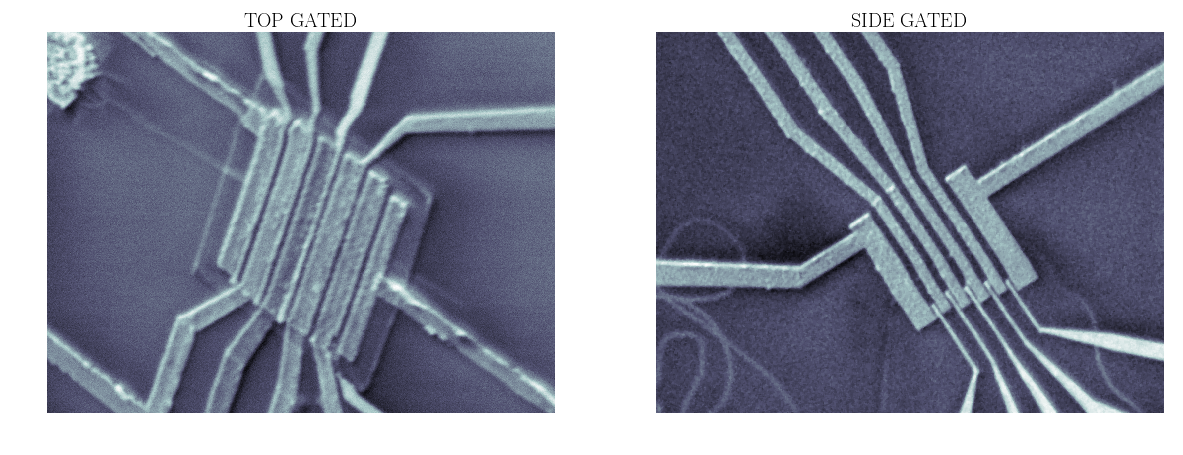

In [24]:
import semimage
from scipy import ndimage 

image_dir = '/Users/nik/Dropbox/Samples/complete/'
thesis_dir = '/Users/nik/Dropbox/Repos/thesis/figures/other_devices/'
top = os.path.join(image_dir, 'scfp14_q2_complete_0.tif')
side = os.path.join(image_dir, 'scf87_complete_02.tif')
im_top = semimage.image_to_np(top)
im_side = semimage.image_to_np(side)

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20,12))
ax1.imshow(im_top, interpolation='nearest', cmap=plt.cm.bone)
ax1.set_title('TOP GATED')
ax1.set_axis_off()
ax2.imshow(ndimage.filters.median_filter(im_side, size=(5,5)), interpolation='nearest', 
           cmap=plt.cm.bone)
ax2.set_title('SIDE GATED')
ax2.set_axis_off()

fig.savefig(os.path.join(thesis_dir, 'gated_device_images.pdf'))